<a href="https://colab.research.google.com/github/TomoharuKurosu/Tomoharu_DS2/blob/main/boruta_suc_house_price.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install rdkit
!pip install dcekit
!pip install boruta

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 33.1/33.1 MB 19.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.2/67.2 kB 2.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.9/57.9 kB 2.0 MB/s eta 0:00:00


In [2]:
import os
import pandas as pd
import numpy as np
import math
import matplotlib.figure as figure
import matplotlib.pyplot as plt
from rdkit import Chem
from rdkit.ML.Descriptors import MoleculeDescriptors
from rdkit.Chem import AllChem
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.metrics import r2_score, mean_absolute_error,mean_squared_error
from dcekit.variable_selection import search_high_rate_of_same_values, search_highly_correlated_variables
from boruta import BorutaPy

In [3]:
from google.colab import drive
drive.mount('/content/drive')
import pandas as pd

Mounted at /content/drive


In [4]:
#データの読み込み
df = pd.read_csv("/content/drive/MyDrive/Bostonhousedata2.csv")


In [5]:
# データの確認
print(df.head())  # データの確認用。目的変数が '住宅価格' であることを確認

   house_price    crime  big_house  near_river     co  average_room  old_rate  \
0         24.0  0.00632       18.0           0  0.538         6.575      65.2   
1         21.6  0.02731        0.0           0  0.469         6.421      78.9   
2         34.7  0.02729        0.0           0  0.469         7.185      61.1   
3         33.4  0.03237        0.0           0  0.458         6.998      45.8   
4         36.2  0.06905        0.0           0  0.458         7.147      54.2   

   access_highway  tax  student_teacher  low_salary  
0               1  296             15.3        4.98  
1               2  242             17.8        9.14  
2               2  242             17.8        4.03  
3               3  222             18.7        2.94  
4               3  222             18.7        5.33  


In [6]:
# 説明変数と目的変数を設定
X = df.drop('house_price', axis=1).values  # '住宅価格'列以外が説明変数　axis=1で列指定　axis=0で行指定
y = df['house_price'].values  # '住宅価格'が目的変数　valuesで数値化

# ランダムフォレストモデルの定義
rf = RandomForestRegressor(n_estimators=100, random_state=42)
#要協議が必要

# Borutaによる特徴選択
boruta_selector = BorutaPy(rf, n_estimators='auto', random_state=42, alpha=0.05)
boruta_selector.fit(X, y)

# 選ばれた特徴量をDataFrameに変換
selected_features = df.drop('house_price', axis=1).columns[boruta_selector.support_].tolist()

# 結果の表示
print("住宅価格に関係する重要な変数:", selected_features)


住宅価格に関係する重要な変数: ['crime', 'co', 'average_room', 'old_rate', 'tax', 'student_teacher', 'low_salary']


In [7]:
##試行錯誤

# 選択された特徴量でデータを分割
X_selected = df[selected_features].values
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42

# モデルの学習
rf.fit(X_train, y_train)

# 予測
y_pred = rf.predict(X_test)

# モデルの評価
print("borurta使用後R²スコア:", r2_score(y_test, y_pred))
print("borurta使用後平均絶対誤差:", mean_absolute_error(y_test, y_pred))
print("borurta使用後平均二乗誤差:", mean_squared_error(y_test, y_pred))


R²スコア: 0.8752139597897245
平均絶対誤差: 2.0561519607843133
平均二乗誤差: 9.151032414215686


In [9]:
# 選択された特徴量でデータを分割
X_selected = df[selected_features].values
X_train_ori, X_test_ori, y_train_ori, y_test_ori = train_test_split(X, y, test_size=0.2, random_state=42)

# モデルの学習
rf.fit(X_train_ori, y_train_ori)

# 予測
y_pred_ori = rf.predict(X_test_ori)

# モデルの評価
print("borurta使用前R²スコア:", r2_score(y_test, y_pred_ori))
print("borurta使用前平均絶対誤差:", mean_absolute_error(y_test, y_pred_ori))
print("borurta使用前平均二乗誤差:", mean_squared_error(y_test, y_pred_ori))

R²スコア: 0.8728008938762408
平均絶対誤差: 2.0740196078431365
平均二乗誤差: 9.327991666666664


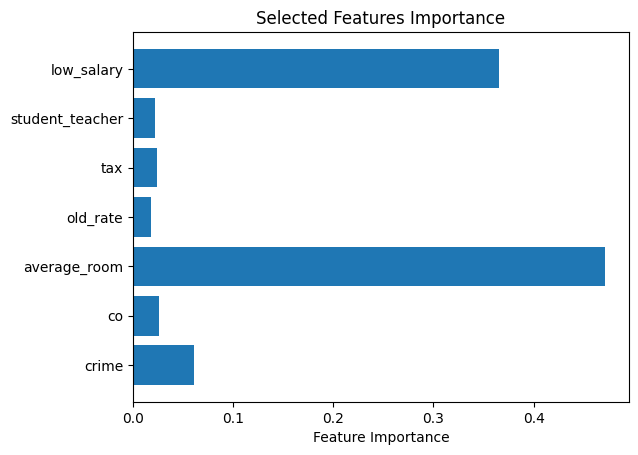

In [10]:
import matplotlib.pyplot as plt

# 特徴量の重要度を取得
importances = rf.feature_importances_[boruta_selector.support_]

# 可視化
plt.barh(selected_features, importances)
plt.xlabel('Feature Importance')
plt.title('Selected Features Importance')
plt.show()
